<a href="https://colab.research.google.com/github/Santushtii/fullstack/blob/main/worksheet0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#task 1:
# Daily time: [study, entertainment, sleep]
time_data = [
(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
(4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
(5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
(3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
(4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

#Create empty lists for classification
low_study = []
moderate_study = []
high_study = []

# Iterate
for rec in time_data:
    study = rec[0] #index 0 for study hours only
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

# Print the output
print("Study hours: ")
print("Low:", low_study)
print("Moderate:", moderate_study)
print("High:", high_study)

Study hours: 
Low: [2.5, 1.5, 2.0, 2.5]
Moderate: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High: [5.5, 6.0]


In [14]:
#task 2:

#Count days with low, moderate and high study hours
print("Days with low study:", len(low_study))
print("Days with moderate study:", len(moderate_study))
print("Days with high study:", len(high_study))


Days with low study: 4
Days with moderate study: 9
Days with high study: 2


In [15]:
#task 3:

#Convert study hours to minutes:
study_mins = []

for record in time_data:
    hours = record[0]
    mins = hours * 60
    study_mins.append(mins)

print(study_mins, " Minutes")

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]  Minutes


In [16]:
#task 4:
#Create empty lists:
study_hours = []
entertainment_hours = []
sleep_hours = []

# Extract data
for stu, ent, sle in time_data:
    study_hours.append(stu)
    entertainment_hours.append(ent)
    sleep_hours.append(sle)

# Calculate required averages
avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average study:", avg_study)
print("Average entertainment:", avg_entertainment)
print("Average sleep:", avg_sleep)

Average study: 3.7
Average entertainment: 2.5
Average sleep: 7.166666666666667


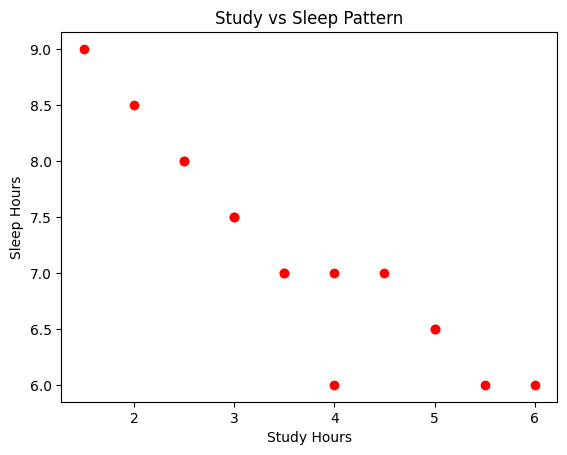

In [17]:
#task 5:

#Graph plotting:
import matplotlib.pyplot as plt

study = [item[0] for item in time_data]
sleep = [item[2] for item in time_data]

plt.scatter(study, sleep, color="red")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.show()


In [18]:
#Recursion task 1:

def sum_nested_list(nested_list):
    """
Calculate the sum of all numbers in a nested list.
This function takes a list that may contain integers and other nested lists.
It recursively traverses the list and sums all the integers, no matter how deeply
nested they are.
Args:
nested_list (list): A list that may contain integers or other lists of integers.
Returns:
int: The total sum of all integers in the nested list, including those in sublists
.
Example:
>>> sum_nested_list([1, [2, [3, 4], 5], 6, [7, 8]])
36
>>> sum_nested_list([1, [2, 3], [4, [5]]])
15
"""
    total = 0
    for element in nested_list:
        if type(element)==list: #check if element is a list
            total += sum_nested_list(element)  # recursive call
        else:
            total += element
    return total
     # return final sum
data = [1, [2, [3, 4], 5], 6, [7, 8]]
print(sum_nested_list(data))

36


In [19]:
#Recursion task 2:

def generate_permutations(c):
    # Base case
    if len(c) <= 1:
        return [c]

    permutations = set()  #Set is used to avoid duplications

    for i in range(len(c)):
        # Fix the current character
        char = c[i]

        # Remaining string
        remaining = c[:i] + c[i+1:]

        for p in generate_permutations(remaining):
            permutations.add(char + p)#Eg: char=a, remaining(p)=bc

    return list(permutations)
print(sorted(generate_permutations("abc")))
print(sorted(generate_permutations("aab")))#Set avoids 'baa' to be repeated twice


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


In [20]:
def calculate_directory_size(directory):
    total_size = 0

    for name, value in directory.items():
        # keys represent file size
        if isinstance(value, int):
            total_size += value

        # dictionary represents subdirectory
        else:
            total_size += calculate_directory_size(value)

    return total_size

# Sample directory structure
directory_structure = {
"file1.txt": 200,
"file2.txt": 300,
"subdir1": {
"file3.txt": 400,
"file4.txt": 100
},
"subdir2": {
"subsubdir1": {
"file5.txt": 250
},
"file6.txt": 150
}
}
print(calculate_directory_size(directory_structure))

1400


In [21]:
#Dynamic Programming: task 1

def min_coins(coins, amount):
    # dp[i] = minimum number of coins to make amount i
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for current_amount in range(coin, amount + 1):
            dp[current_amount] = min(dp[current_amount],
                                     dp[current_amount - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1

print(min_coins([1, 2, 5], 11))


3


In [22]:
#Dynamic Programming: task 2

def longest_common_subsequence(s1, s2):
    n = len(s1)
    m = len(s2)

    # Create DP table (n+1) × (m+1)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]
print(longest_common_subsequence("abcde", "ace"))



3


In [23]:
def knapsack(weights, values, capacity):
    n = len(weights)

    # Create table of size (n+1) × (capacity+1)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        wt = weights[i - 1]
        val = values[i - 1]

        for cap in range(1, capacity + 1):
            if wt <= cap:
                # Option 1: include item
                include = val + dp[i - 1][cap - wt]
                # Option 2: exclude item
                exclude = dp[i - 1][cap]
                dp[i][cap] = max(include, exclude)
            else:
                dp[i][cap] = dp[i - 1][cap]

    return dp[n][capacity]

weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))



9
